In [1]:
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Initialising the tickers, if not ok get the right one from yahoo finance
tickers = ['TCS.NS',"ICICIBANK.NS","RELIANCE.NS",'BHARTIARTL.NS',
          'ITC.NS','MARUTI.NS','BAJFINANCE.NS']
#DOWNLOADING 3YRS OF DATA
df=yf.download(tickers,period='3y')
close=df.Close

[*********************100%%**********************]  7 of 7 completed


In [3]:
# The code calculates the daily percentage returns for each stock in the close DataFrame. 
# The returns are normalized by dividing each closing price by the initial closing price and
# then multiplying by 100. 
# This helps in comparing the performance of different stocks on a common scale.
norm =close.div(close.iloc[0]).mul(100)

In [4]:
# The code calculates the daily percentage returns for each stock and stores them in ret DF
ret=close.pct_change().dropna()
ret

,BAJFINANCE.NS,BHARTIARTL.NS,ICICIBANK.NS,ITC.NS,MARUTI.NS,RELIANCE.NS,TCS.NS
Date,,,,,,,
2020-10-07,-0.041203,-0.010076,0.005386,-0.002354,0.022416,0.021331,0.007976
2020-10-08,-0.001411,0.004734,0.012675,-0.013864,0.004676,-0.008084,0.032804
2020-10-09,-0.002570,0.001767,0.036129,0.004188,-0.002465,-0.002590,-0.004512
2020-10-12,0.002803,-0.023871,0.006351,0.025916,0.010513,0.001612,0.006061
2020-10-13,-0.016410,0.000602,-0.019305,-0.011905,-0.014538,0.019512,-0.001219
...,...,...,...,...,...,...,...
2023-09-29,0.009271,0.000810,0.009866,0.008281,0.004283,0.004670,-0.002304
2023-10-03,0.020081,-0.001187,-0.012186,-0.010464,-0.024852,-0.011450,-0.004180
2023-10-04,-0.014252,-0.001135,-0.010901,-0.008300,-0.020977,-0.001726,0.006802


In [5]:
ret.cov()

,BAJFINANCE.NS,BHARTIARTL.NS,ICICIBANK.NS,ITC.NS,MARUTI.NS,RELIANCE.NS,TCS.NS
BAJFINANCE.NS,0.000395,0.000089,0.000156,0.000083,0.000098,0.000109,0.000064
BHARTIARTL.NS,0.000089,0.000237,0.000083,0.000055,0.000065,0.000050,0.000049
ICICIBANK.NS,0.000156,0.000083,0.000266,0.000069,0.000078,0.000076,0.000043
ITC.NS,0.000083,0.000055,0.000069,0.000202,0.000054,0.000059,0.000032
MARUTI.NS,0.000098,0.000065,0.000078,0.000054,0.000248,0.000060,0.000043
RELIANCE.NS,0.000109,0.000050,0.000076,0.000059,0.000060,0.000254,0.000061
TCS.NS,0.000064,0.000049,0.000043,0.000032,0.000043,0.000061,0.000176


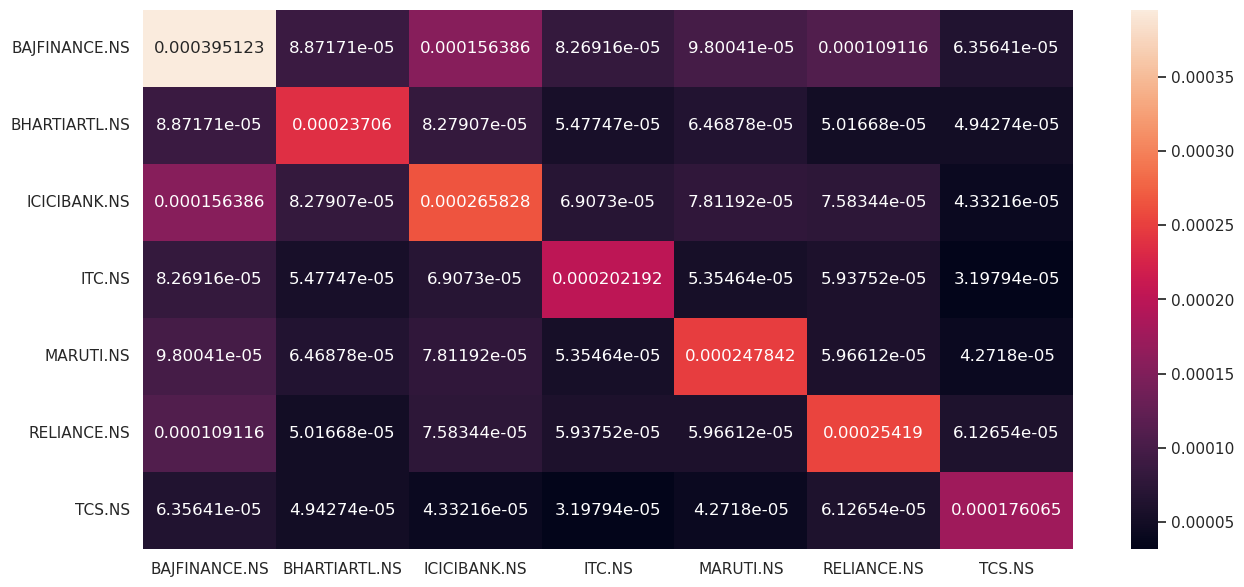

In [19]:
plt.figure(figsize=(15,7))
dataplot = sns.heatmap(ret.cov(),annot = True,fmt = 'g')
plt.show()